In [1]:
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
api_key = os.getenv("news_api")

In [4]:
from newsapi import NewsApiClient

In [5]:
newsapi = NewsApiClient(api_key=api_key)

In [6]:
bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en")

In [7]:
bitcoin_headlines['totalResults']

3694

In [8]:
et_headlines = newsapi.get_everything(q="ethereum", language="en")

In [9]:
analyzer = SentimentIntensityAnalyzer()

In [10]:
bitcoin_sentiments = []
for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2020-09-10,Two alleged crypto traders in Singapore appare...,-0.6908,0.000,0.16,0.840
1,2020-09-08,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",0.0000,0.000,0.00,1.000
2,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.00,0.937
3,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.00,1.000
4,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.00,1.000


In [11]:
et_sentiments = []
for article in et_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        et_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
et_df = pd.DataFrame(et_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
et_df = et_df[cols]
et_df.head()

,date,text,compound,positive,negative,neutral
0,2020-09-02,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.0,0.791
1,2020-09-07,TL;DR: The Complete Stock and Cryptocurrency I...,0.0000,0.000,0.0,1.000
2,2020-09-18,"September\r\n18, 2020\r\n6 min read\r\nOpinion...",0.0000,0.000,0.0,1.000
3,2020-08-26,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.0,0.819
4,2020-08-25,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.0,1.000


In [12]:
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.371550,0.076050,0.008000,0.915950
std,0.320603,0.046397,0.035777,0.046388
min,-0.690800,0.000000,0.000000,0.802000
25%,0.448550,0.083250,0.000000,0.910000
50%,0.507000,0.090000,0.000000,0.910000
75%,0.507000,0.090000,0.000000,0.910000
max,0.750600,0.198000,0.160000,1.000000


In [13]:
et_df.describe()

,compound,positive,negative,neutral
count,16.000000,16.000000,16.000000,16.000000
mean,0.190694,0.063062,0.015688,0.921312
std,0.298172,0.070121,0.034763,0.085886
min,-0.267700,0.000000,0.000000,0.747000
25%,0.000000,0.000000,0.000000,0.871000
50%,0.000000,0.053500,0.000000,0.931000
75%,0.401900,0.097250,0.000000,1.000000
max,0.757900,0.209000,0.110000,1.000000


## Questions:
### Q: Which coin had the highest mean positive score?

#### A: Bitcoin

### Q: Which coin had the highest compound score?

#### A: Ethereum

### Q. Which coin had the highest positive score?

#### A: Ethereum

# Tokenizer

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [17]:
import nltk

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kimcurvo/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/kimcurvo/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [58]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kimcurvo/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [55]:
lemmatizer = WordNetLemmatizer()

In [98]:
bitcoin_sw = ['crypto','bitcoin','cryptocurrency','BTC','dollars','dollar','Bitcoin','currency','Ethereum','Satoshi','Nakaboto','','satoshi','nakaboto']

In [99]:
def tokenizer(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words]
    regex = re.compile("[^a-zA-Z ]")
    words = [regex.sub('', word) for word in words]
    sw = set(stopwords.words('english')+ bitcoin_sw)
    words = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in words if word not in sw]
    return tokens

In [100]:
btc_tokens= [tokenizer(text) for text in bitcoin_df.text]

In [101]:
et_tokens= [tokenizer(text) for text in et_df.text]

In [102]:
bitcoin_df['tokens'] = btc_tokens

In [103]:
et_df['tokens'] = et_tokens

In [104]:
et_df.sample(2)

,date,text,compound,positive,negative,neutral,tokens
8,2020-09-01,"Ethereum, having long played second fiddle to ...",0.4019,0.11,0.0,0.89,"[ethereum, long, played, second, fiddle, numbe..."
10,2020-09-17,Ethereum based Uniswap gave 400 UNI to all use...,0.0000,0.00,0.0,1.00,"[ethereum, based, uniswap, gave, uni, user, us..."


# NGrams and Frequency Analysis

In [122]:
from collections import Counter
from nltk import ngrams

In [111]:
btc_counts = [Counter(ngrams(word, n=2)) for word in bitcoin_df.tokens]
btc_counts[0]

Counter({('two', 'alleged'): 1,
         ('alleged', 'trader'): 1,
         ('trader', 'singapore'): 1,
         ('singapore', 'apparently'): 1,
         ('apparently', 'came'): 1,
         ('came', 'foolproof'): 1,
         ('foolproof', 'plan'): 1,
         ('plan', 'rather'): 1,
         ('rather', 'convert'): 1,
         ('convert', 'customer'): 1,
         ('customer', 'singapore'): 1,
         ('singapore', 'would'): 1,
         ('would', 'simply'): 1,
         ('simply', 'rob'): 1,
         ('rob', 'victim'): 1,
         ('victim', 'came'): 1,
         ('came', 'char'): 1})

In [112]:
et_counts = [Counter(ngrams(word, n=2)) for word in et_df.tokens]
et_counts[0]

Counter({('interacted', 'cryptocurrencies'): 1,
         ('cryptocurrencies', 'past'): 1,
         ('past', 'couple'): 1,
         ('couple', 'year'): 1,
         ('year', 'good'): 1,
         ('good', 'chance'): 1,
         ('chance', 'used'): 1,
         ('used', 'metamask'): 1,
         ('metamask', 'wallet'): 1,
         ('wallet', 'form'): 1,
         ('form', 'browser'): 1,
         ('browser', 'extension'): 1,
         ('extension', 'support'): 1,
         ('support', 'ether'): 1,
         ('ether', 'char'): 1})

In [133]:
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [162]:
str1 = []
for x in bitcoin_df.tokens:
    str1 += x
btc_tcount = token_count(str1)
btc_tcount

[('char', 20),
 ('robot', 14),
 ('colleague', 14),
 ('writes', 14),
 ('every', 14),
 ('fucking', 14),
 ('day', 14),
 ('welcome', 14),
 ('another', 14),
 ('edition', 14)]

In [155]:
str2 = []
for x in et_df.tokens:
    str2 += x
    et_tcount = token_count(str2)
et_tcount

[('char', 16),
 ('ethereum', 7),
 ('price', 4),
 ('ha', 4),
 ('getty', 4),
 ('used', 3),
 ('september', 3),
 ('decentralized', 3),
 ('exchange', 3),
 ('image', 3)]

# WORDCLOUD

In [163]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [164]:
def listToString(s):  
    
    # initialize an empty string 
    str1b = " " 
    
    # return string   
    return (str1b.join(s))

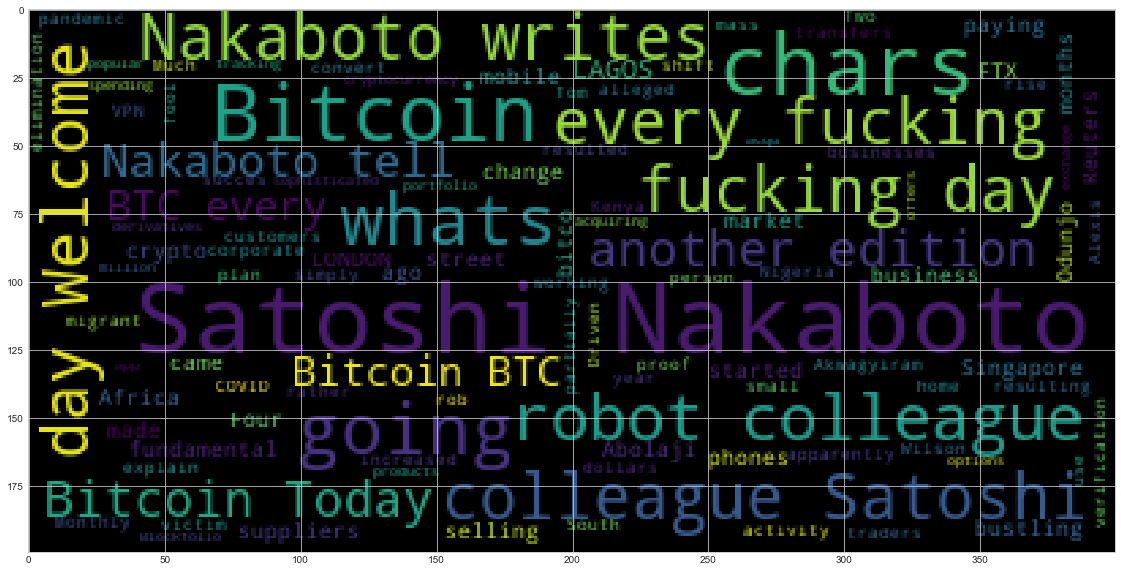

In [170]:
wc = WordCloud().generate(listToString(bitcoin_df.text))
plt.imshow(wc)

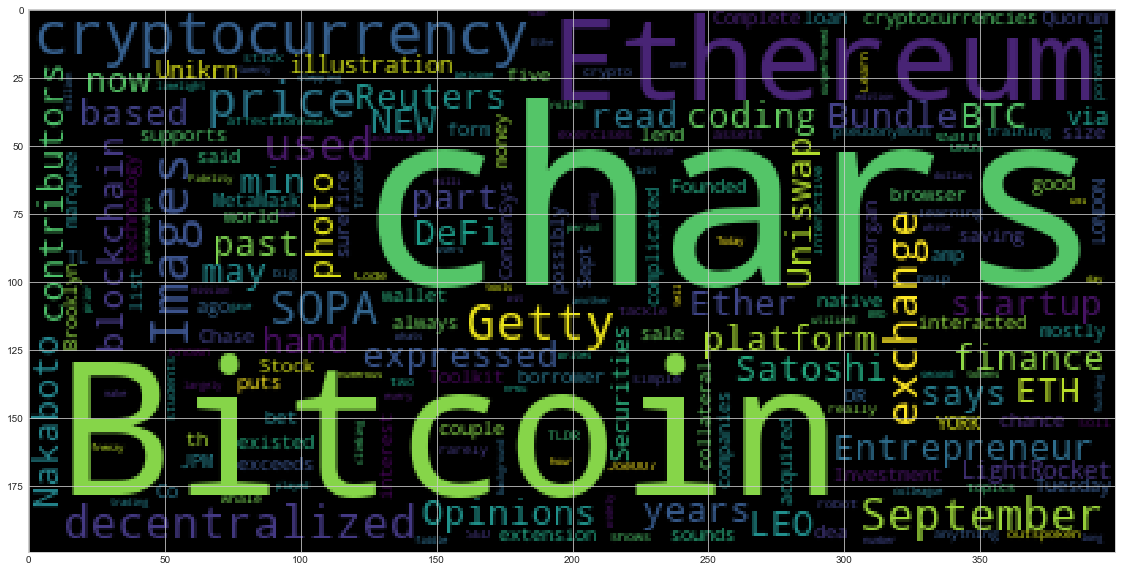

In [171]:
wc_et = WordCloud().generate(listToString(et_df.text))
plt.imshow(wc_et)

# Named Entity Recognition

In [172]:
import spacy
from spacy import displacy

In [173]:
nlp = spacy.load('en_core_web_sm')

In [176]:
doc = nlp(listToString(bitcoin_df.text))
displacy.render(doc, style='ent')

In [177]:
print([ent.text for ent in doc.ents])

['Two', 'Singapore', '365,000 Singapore dollars', 'bitcoin', 'Alexis Akwagyiram', 'Tom Wilson', 'Monthly', 'Africa', '55%', 'a year', 'Nigeria', 'South Africa', 'Kenya', 'VPN', 'LAGOS/LONDON', 'Reuters', 'Four months ago', 'Abolaji Odunjo', 'Lagos', 'LAGOS/LONDON', 'Reuters', 'Four months ago', 'Abolaji Odunjo', 'Lagos', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Blockfolio', 'FTX', '$150 million', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakabo

In [178]:
doc1 = nlp(listToString(et_df.text))
displacy.render(doc1, style='ent')

In [179]:
print([ent.text for ent in doc1.ents])

['the past couple of years', 'The Complete Stock and Cryptocurrency Investment Toolkit Bundle', '29.46', 'Sept. 7', '97%', 'September', '18', '2020', '6 min', 'five years ago', 'Ethereum', 'ETH', 'LONDON', 'Reuters', 'about 20%', 'NEW YORK', 'Reuters', 'Brooklyn', 'ConsenSys', 'JPMorgan Chase &amp', 'Quorum', 'Tuesday', 'Bitcoin', 'BTC', 'two', 'UNUS SED LEO', 'LEO', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'second', 'one', 'bitcoin', 'more than 10%', '24-hour', '$100 million', 'Deloitte', 'KPMG', 'Fidelity', '$100 milli', 'Uniswap', '400', 'UNI', 'September 1', 'twenty dollars', 'May', 'bitcoin', 'DeFi', 'DeFi', 'Ethereum', 'Mateusz Slodkowski/', 'Bitcoin', 'Bitcoin', 'as high as $12,086', 'Ethereum (ETH', 'The Securities and Exchange Commission', 'Unikrn', 'Unikrn', 'UnikoinGold', 'September', '16', '2020', '6 min', 'the past few months', 'working dynamics']
